### Co-Hort Analysis

Cohort analysis is a subset of behavioral analytics that takes the data from a given eCommerce platform, web application, or online game and rather than looking at all users as one unit, it breaks them into related groups for analysis. These related groups, or cohorts, usually share common characteristics or experiences within a defined time-span.

- Source : https://clevertap.com/blog/cohort-analysis/

### Object Analysis

Online retail or online shopping refers to a form of electronic commerce where consumers directly buy goods or services from a seller via the Internet rather than physically entering a brick-and-mortar store. Customers usually visit the company's website, select a product, enter payment information and shipping details, and then order the product. All of these steps are completed entirely online. 
- Source : https://www.thebalancesmb.com/selling-online-retailing-storefront-alternatives-2890252

### Business Problem

- How Retention Calculation By Customer ?
- How Retention Calculation as Percentage By Customer ?
- How Retention Calculation as Average Quantity Purchase By Customer ?
- How Retention Calculation as Average Total Sales Purchase By Customer ?

### Data Source

Online Retail Dataset
- This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.
- Source : https://www.kaggle.com/mashlyn/online-retail-ii-uci

### Information About Data

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

### Innovation Solution Strategy

- Get Data from Data Source
- Explore About Data
- Pre-processing About Data
- Convert Data Type If Necessary
- Create Calculation Date to Know First Invoice By Customer
- Create Calculation Difference Date to Know Difference Between Last Invoice and Firts Invoice
- Create Calculation to Knows Co-Hort Index Analysis
- Create Visualization Retention Calculation
- Create Visualization Retention Calculation as Percentage By Customer
- Create Visualization Average Quantity Purchase By Customer
- Create Visualization Average Total Sales Purchase By Customer

### Import Library

In [1]:
import numpy as np # calculation
import pandas as pd # Csv for Python
import datetime as dt # allow for date and time series manipulation
import seaborn as sns # a charting package
import matplotlib.pyplot as plt # the original Python chating package

#a `magic code` that allows ploting of charts within the notebook
%matplotlib inline

# Sets all rows to display
pd.options.display.max_rows = None

#Stops a false alarm chaining error
pd.options.mode.chained_assignment = None

### Import Dataset

In [2]:
data = pd.read_csv('Online Retail.csv')

### Explore Dataset

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

#### 1. Function to Explore Dataset

In [5]:
def explore(x):
    divider = "*_*"
    print("\n {} \n".format((divider*20))) #creates a dvider between each method output breaking at each end.
    
    print("Dataframe Makeup \n") #title for output.
    
    x.info() # Explains what the data and values the data is madeup from.
    
    print("\n {} \n".format((divider*20))) #creates a dvider between each method output breaking at each end.
    
    print("Descriptive Statistics \n\n", x.describe().round(2)) #Gives a statstical breakdown of the data.
    
    print("\n {} \n".format((divider*20))) #creates a dvider between each method output breaking at each end.
    
    print("Shape of dataframe: {}".format(x.shape)) # Gives the shape of the data.
    
    print("\n {} \n".format((divider*20))) #creates a dvider between each method output breaking at each end.
    return

In [6]:
explore(data)


 *_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_* 

Dataframe Makeup 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

 *_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_* 

Descriptive Statistics 

         Quantity  UnitPrice  CustomerID
count  541909.00  541909.00   406829.00
mean        9.55       4.61    15287.69
std       218.08      96.76     1713.60
min    -80995.00  -11062.06    12346.00
25%         1.00      

#### 2. Function to Check Missing Data on Dataset

In [7]:
def missing_data(x):
    return x.isna().sum()

In [8]:
missing_data(data)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
cleaned_data = data.dropna(subset=['CustomerID'])

In [10]:
missing_data(cleaned_data)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


### Convert Object Type to Datetime Type on Dataset

In [13]:
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])

In [14]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### Function to Splitting Date on Dataset

In [15]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [16]:
cleaned_data['InvoiceMonth'] = cleaned_data['InvoiceDate'].apply(get_month)

In [17]:
cleaned_data['InvoiceMonth'].head()

0   2010-12-01
1   2010-12-01
2   2010-12-01
3   2010-12-01
4   2010-12-01
Name: InvoiceMonth, dtype: datetime64[ns]

In [18]:
cleaned_data['CohortMonth'] = cleaned_data.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [19]:
cleaned_data['CohortMonth'].head()

0   2010-12-01
1   2010-12-01
2   2010-12-01
3   2010-12-01
4   2010-12-01
Name: CohortMonth, dtype: datetime64[ns]

In [20]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


### Function to Splitting Date on Dataset

In [21]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

#### 1. Splitting Date on InvoiceMonth

In [22]:
invoice_year, invoice_month, _ = get_date(cleaned_data, 'InvoiceMonth') 

In [23]:
invoice_month[:4]

0    12
1    12
2    12
3    12
Name: InvoiceMonth, dtype: int64

In [24]:
invoice_year[:4]

0    2010
1    2010
2    2010
3    2010
Name: InvoiceMonth, dtype: int64

#### 2. Splitting Date on InvoiceMonth

In [25]:
first_invoice_year, first_invoice_month, _ = get_date(cleaned_data, 'CohortMonth')

In [26]:
first_invoice_month[:4]

0    12
1    12
2    12
3    12
Name: CohortMonth, dtype: int64

In [27]:
first_invoice_year[:4]

0    2010
1    2010
2    2010
3    2010
Name: CohortMonth, dtype: int64

### Getting Difference Between FirtsYear and InvoiceYear 

In [28]:
year_diff = invoice_year - first_invoice_year

In [29]:
year_diff[:4]

0    0
1    0
2    0
3    0
dtype: int64

### Getting Difference Between FirtsMonth and InvoiceMonth

In [30]:
month_diff = invoice_month - first_invoice_month

In [31]:
month_diff[:4]

0    0
1    0
2    0
3    0
dtype: int64

### Create Calculation Co-Hort Index

In [32]:
cleaned_data['CohortIndex'] = year_diff * 12 + month_diff + 1

In [33]:
cleaned_data['CohortIndex'].head()

0    1
1    1
2    1
3    1
4    1
Name: CohortIndex, dtype: int64

In [34]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


### Co-Hort Analysis Visualization

In [35]:
cohort_data = cleaned_data.groupby(
    ['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()

In [36]:
#Take the cohort_data and plumb it into a Pivot Table. Setting index, columns and values as below.
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerID')

In [37]:
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create Retention as a Percentage

In [38]:
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis=0)
retention.round(3)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02-01,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03-01,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04-01,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Creating Co-Hort Heatmaps Visualization

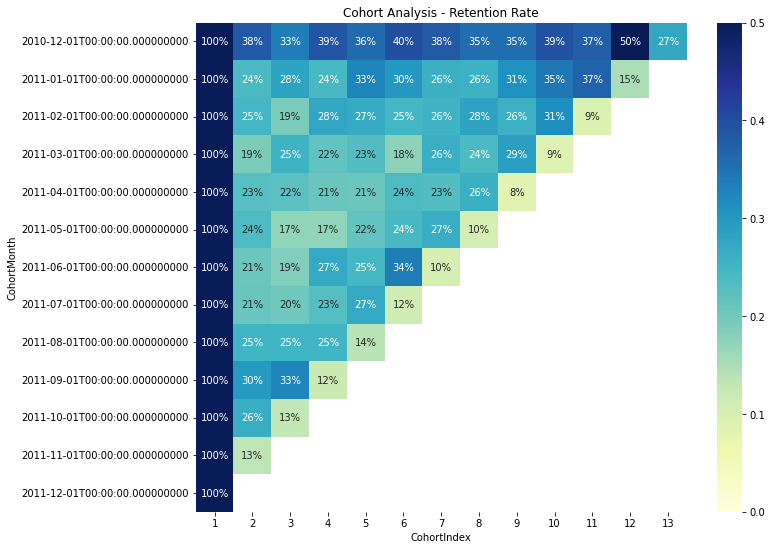

In [39]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()

### Create Co-Hort Average Quantity Sold Visualization

In [40]:
cohort_data2 = cleaned_data.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()
average_quantity  = cohort_data2.pivot_table(index = 'CohortMonth',
                                            columns = 'CohortIndex',
                                       values = 'Quantity').round(1)
average_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


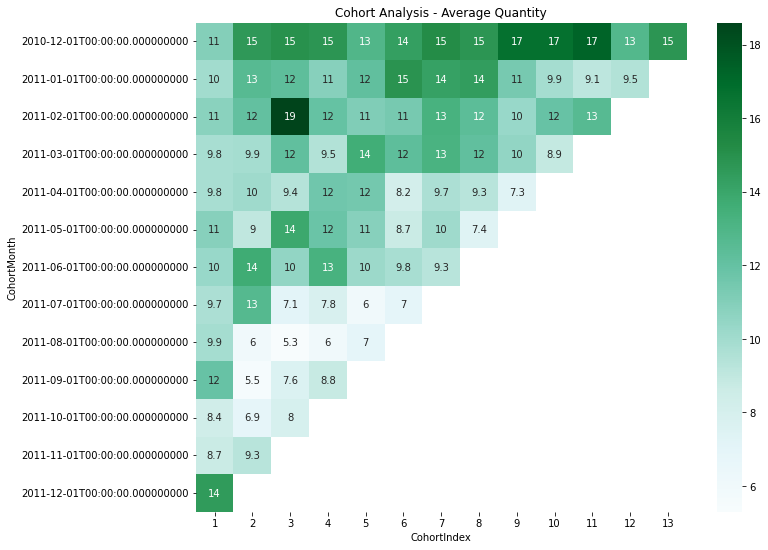

In [41]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Quantity')
sns.heatmap(data = average_quantity, 
            annot = True, 
            cmap = "BuGn")
plt.show()

### Create Co-Hort Average Sale Visualization

In [42]:
cleaned_data['TotalSale'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

In [43]:
cleaned_data['TotalSale'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: TotalSale, dtype: float64

In [44]:
cohort_data3 = cleaned_data.groupby(['CohortMonth', 'CohortIndex'])['TotalSale'].mean().reset_index()
average_sales  = cohort_data3.pivot_table(index = 'CohortMonth',
                                           columns = 'CohortIndex',
                                      values = 'TotalSale').round(1)
average_sales

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,20.7,25.0,25.1,25.0,19.9,25.5,26.5,25.4,26.0,31.1,30.6,22.2,24.7
2011-01-01,18.4,23.5,20.3,17.5,21.5,25.4,24.4,24.5,18.7,20.1,18.7,18.4,NaN
2011-02-01,17.0,17.0,19.3,18.8,16.1,15.1,21.6,20.9,17.5,20.6,21.5,NaN,NaN
2011-03-01,17.0,17.9,21.5,17.0,19.2,18.1,21.7,17.3,15.4,11.4,NaN,NaN,NaN
2011-04-01,16.4,20.2,18.8,18.4,18.6,14.2,14.6,15.3,11.8,NaN,NaN,NaN,NaN
2011-05-01,19.0,15.7,21.2,19.4,17.8,14.1,16.1,13.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,16.4,14.5,19.0,19.8,15.0,15.9,12.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,13.1,21.2,11.4,12.4,10.5,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.1,11.9,11.5,14.4,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


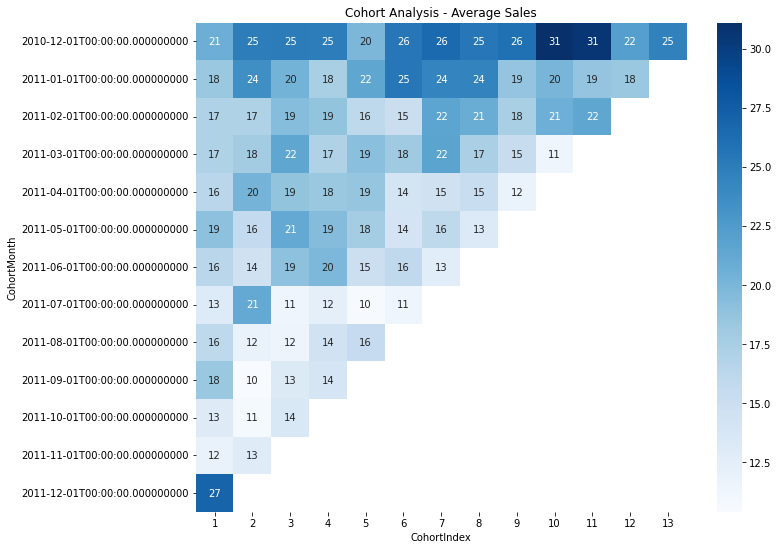

In [45]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Sales')
sns.heatmap(data = average_sales, 
            annot = True, 
            cmap = "Blues")
plt.show()

### End